In [1]:
import glob
import random
import matplotlib.pyplot as plt
import json
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, BatchNormalization, Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.compat.v1 import ConfigProto, InteractiveSession
from tensordash.tensordash import Tensordash

In [2]:
config=ConfigProto()
config.gpu_options.allow_growth=True
sess=InteractiveSession(config=config)

In [3]:
testdog=glob.glob("dataset/test_set/dogs/*.jpg")
testcat=glob.glob("dataset/test_set/cats/*.jpg")
traincat=glob.glob("dataset/training_set/cats/*.jpg")
traindog=glob.glob("dataset/training_set/dogs/*.jpg")

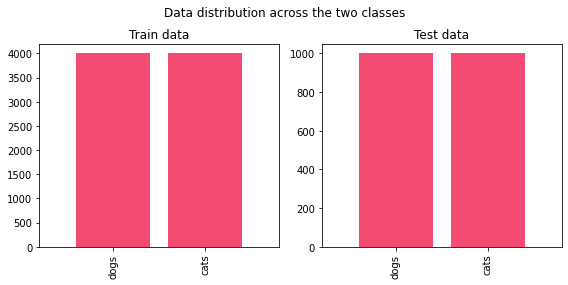

In [4]:
c=[0,1]
names=["dogs","cats"]
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(122)
ax1.bar(c,[len(testdog), len(testcat)],color="#f44b74")
ax1.set_xticks(c)
ax1.set_xticklabels(names, rotation=90)
ax1.set_xlim((-0.8,2-0.2))
ax1.set_title("Test data")
ax2=fig.add_subplot(121)
ax2.bar(c,[len(traindog), len(traincat)],color="#f44b74")
ax2.set_xticks(c)
ax2.set_xticklabels(names, rotation=90)
ax2.set_xlim((-0.8,2-0.2))
ax2.set_title("Train data")
plt.tight_layout()
fig.suptitle("Data distribution across the two classes")
fig.subplots_adjust(top=0.85)
plt.savefig('resources/data_analysis.png',dpi=300)
plt.show()

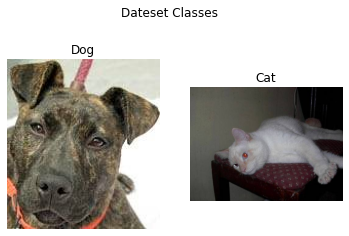

In [5]:
fig = plt.figure()
ax1=fig.add_subplot(121)
ax1.imshow(plt.imread(traindog[random.randint(0, len(traindog))]))
ax1.set_title("Dog")
ax1.axis('off')
ax2=fig.add_subplot(122)
ax2.imshow(plt.imread(traincat[random.randint(0, len(traincat))]))
ax2.set_title("Cat")
ax2.axis('off')
fig.suptitle("Dateset Classes")
fig.savefig("resources/classes.png")
plt.show()

In [6]:
batch_size=32

traingen=ImageDataGenerator(rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True, rescale=1/255.0)
traindata=traingen.flow_from_directory("dataset/training_set", target_size=(128,128), batch_size=32, class_mode='binary')

testgen=ImageDataGenerator(rescale=1/255.0)
testdata=testgen.flow_from_directory("dataset/test_set", target_size=(128,128), batch_size=32, class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [7]:
def model():
    inp=Input(shape=(128,128,3))
    
    x=Conv2D(32, 3, padding='same', activation='relu')(inp)
    x=MaxPool2D()(x)
    x=BatchNormalization(momentum=0.8)(x)

    x=Conv2D(64, 3, padding='same', activation='relu')(x)
    x=MaxPool2D()(x)
    x=BatchNormalization(momentum=0.8)(x)

    x=Conv2D(128, 3, padding='same', activation='relu')(x)
    x=MaxPool2D()(x)
    x=BatchNormalization(momentum=0.8)(x)

    x=Conv2D(256, 3, padding='same', activation='relu')(x)
    x=MaxPool2D()(x)
    x=BatchNormalization(momentum=0.8)(x)

    x=Conv2D(512, 3, padding='same', activation='relu')(x)
    x=MaxPool2D()(x)
    x=BatchNormalization(momentum=0.8)(x)

    x=Flatten()(x)
    x=Dense(256, activation='relu')(x)
    x=Dense(1, activation='sigmoid')(x)

    return Model(inp, x)

In [8]:
tdash=Tensordash(email="sagnik106@gmail.com", ModelName="Dog Cat Classifier")

In [9]:
m=model()
m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
m.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256   

In [10]:
history=m.fit(traindata, epochs=20, steps_per_epoch=traindata.samples//batch_size, validation_data=testdata, validation_steps=testdata.samples//batch_size, callbacks=[tdash])

Epoch 1/20
250/250 [==============================] - 42s 167ms/step - loss: 0.8181 - accuracy: 0.6097 - val_loss: 0.6080 - val_accuracy: 0.6683
Epoch 2/20
250/250 [==============================] - 41s 165ms/step - loss: 0.5980 - accuracy: 0.6791 - val_loss: 0.5034 - val_accuracy: 0.7616
Epoch 3/20
250/250 [==============================] - 41s 165ms/step - loss: 0.5582 - accuracy: 0.7141 - val_loss: 0.4745 - val_accuracy: 0.7666
Epoch 4/20
250/250 [==============================] - 43s 172ms/step - loss: 0.5250 - accuracy: 0.7354 - val_loss: 0.4839 - val_accuracy: 0.7636
Epoch 5/20
250/250 [==============================] - 41s 163ms/step - loss: 0.4864 - accuracy: 0.7638 - val_loss: 0.4395 - val_accuracy: 0.7812
Epoch 6/20
250/250 [==============================] - 41s 165ms/step - loss: 0.4599 - accuracy: 0.7851 - val_loss: 0.4574 - val_accuracy: 0.7928
Epoch 7/20
250/250 [==============================] - 41s 166ms/step - loss: 0.4343 - accuracy: 0.7945 - val_loss: 0.3780 - val_ac

# Model Performance

In [11]:
histories=history.history

## Saving the performance history

In [12]:
f=open("resources/log.json", "w")
json.dump(histories, f)
f.close()

## Loading the performance history

In [13]:
f=open("resources/log.json", "r")
histories=json.load(f)
f.close()

## Visualization

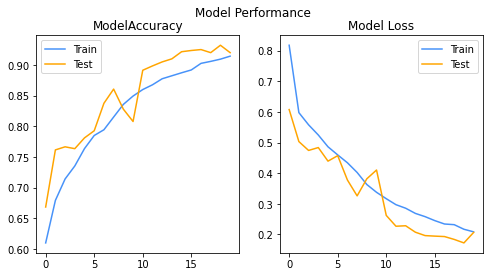

In [14]:
fig=plt.figure(figsize=(8,4))
ax1=fig.add_subplot(122)
ax1.plot(histories["loss"], color='#4792f9', label="Train")
ax1.plot(histories["val_loss"], color='#ffa500', label="Test")
ax1.set_title("Model Loss")
ax1.legend()
ax2=fig.add_subplot(121)
ax2.plot(histories["accuracy"], color='#4792f9', label="Train")
ax2.plot(histories["val_accuracy"], color='#ffa500', label="Test")
ax2.legend()
ax2.set_title("ModelAccuracy")
fig.suptitle("Model Performance")
fig.savefig("resources/performance.png",dpi=300)

## Saving the model

In [15]:
m.save("model.h5")